In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("/content/sample_data/Smart Home Dataset.csv",low_memory=False)

In [6]:
# time sütununu sayıya zorla
df["time"] = pd.to_numeric(df["time"], errors="coerce")

# bozuk timestamp olan satırları sil
df = df.dropna(subset=["time"])

# datetime dönüşümü
df["datetime"] = pd.to_datetime(df["time"], unit="s")
df["hour"] = df["datetime"].dt.hour
df["weather"] = df["summary"]


In [7]:
devices = [
    "Dishwasher [kW]",
    "Fridge [kW]",
    "Furnace 1 [kW]",
    "Microwave [kW]",
    "Living room [kW]"
]

In [8]:
pivot_hour = pd.pivot_table(
    df,
    values=devices,
    index="hour",
    aggfunc="mean"
)

print("\n==============================")
print("SAAT BAZLI BASELINE (PIVOT)")
print("==============================")
print(pivot_hour)

baseline_df = pivot_hour.reset_index()


SAAT BAZLI BASELINE (PIVOT)
      Dishwasher [kW]  Fridge [kW]  Furnace 1 [kW]  Living room [kW]  \
hour                                                                   
0            0.032461     0.065616        0.111121          0.038488   
1            0.034263     0.065082        0.072505          0.029337   
2            0.027059     0.070691        0.065363          0.034848   
3            0.036545     0.066365        0.091933          0.031765   
4            0.032463     0.068293        0.078525          0.034269   
5            0.031261     0.060125        0.092088          0.033442   
6            0.033316     0.062070        0.083772          0.027953   
7            0.031537     0.063761        0.092515          0.041666   
8            0.037359     0.065101        0.068629          0.037738   
9            0.023753     0.063545        0.084611          0.034054   
10           0.034242     0.065980        0.091806          0.038523   
11           0.034050     0.064184 

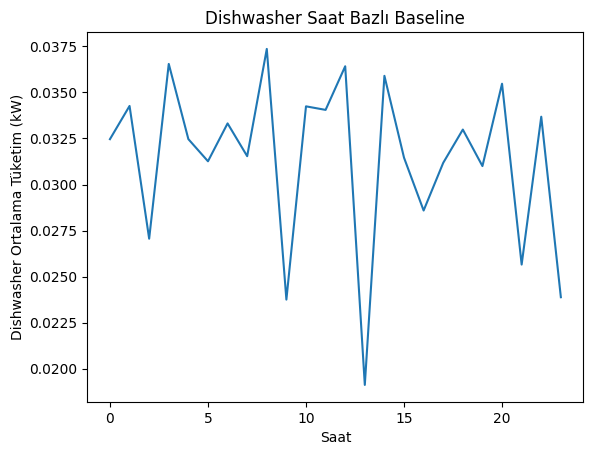

In [9]:
plt.figure()
plt.plot(baseline_df["hour"], baseline_df["Dishwasher [kW]"])
plt.xlabel("Saat")
plt.ylabel("Dishwasher Ortalama Tüketim (kW)")
plt.title("Dishwasher Saat Bazlı Baseline")
plt.show()


In [10]:
X = baseline_df[["hour"]]
y = baseline_df["Dishwasher [kW]"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



Linear Regression MAE: 0.0027228265056475605


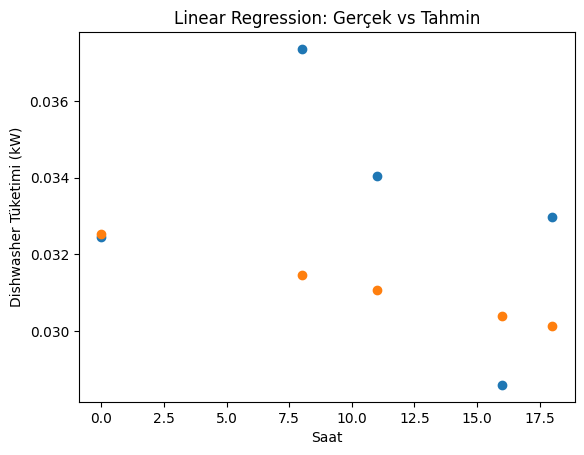

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression MAE:",
      mean_absolute_error(y_test, y_pred_lr))

plt.figure()
plt.scatter(X_test["hour"], y_test)
plt.scatter(X_test["hour"], y_pred_lr)
plt.xlabel("Saat")
plt.ylabel("Dishwasher Tüketimi (kW)")
plt.title("Linear Regression: Gerçek vs Tahmin")
plt.show()

Random Forest MAE: 0.0024429631563695894


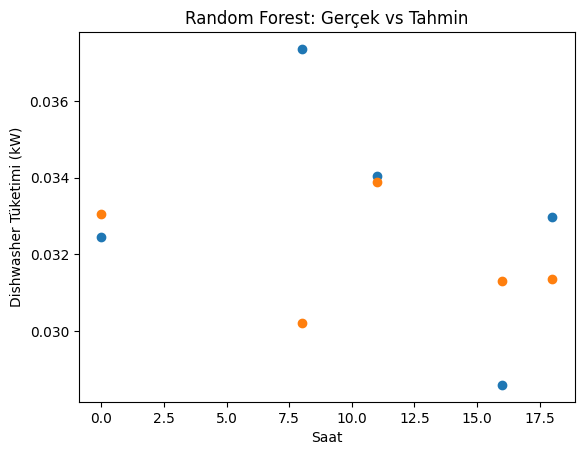

In [12]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:",
      mean_absolute_error(y_test, y_pred_rf))

plt.figure()
plt.scatter(X_test["hour"], y_test)
plt.scatter(X_test["hour"], y_pred_rf)
plt.xlabel("Saat")
plt.ylabel("Dishwasher Tüketimi (kW)")
plt.title("Random Forest: Gerçek vs Tahmin")
plt.show()

In [13]:
pivot_hour_weather = pd.pivot_table(
    df,
    values=devices,
    index=["hour", "weather"],
    aggfunc="mean"
)

print("\n==============================")
print("SAAT + HAVA DURUMU BASELINE")
print("==============================")
print(pivot_hour_weather.head())



SAAT + HAVA DURUMU BASELINE
                    Dishwasher [kW]  Fridge [kW]  Furnace 1 [kW]  \
hour weather                                                       
0    Clear                 0.037048     0.066082        0.115416   
     Drizzle               0.000062     0.065496        0.111652   
     Light Rain            0.056913     0.074320        0.086981   
     Light Snow            0.000078     0.028038        0.165615   
     Mostly Cloudy         0.000382     0.099288        0.034824   

                    Living room [kW]  Microwave [kW]  
hour weather                                          
0    Clear                  0.039778        0.011720  
     Drizzle                0.144217        0.127467  
     Light Rain             0.015785        0.022957  
     Light Snow             0.001293        0.003143  
     Mostly Cloudy          0.002209        0.003649  
